In [1]:
#Load python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from ase import io

([<matplotlib.axis.YTick at 0x11fe71cf8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

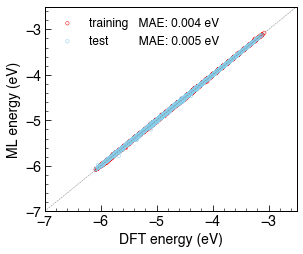

In [2]:
#ALIGNN parity plot

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 1.8*1.5*1.67323,1.5*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['axes.linewidth'] = 1

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=7*2.0)

fig, ax = plt.subplots()

X = pd.read_csv('alignn_training.csv')['dft']
y = pd.read_csv('alignn_training.csv')['model']

ax.scatter(X,
           y,
           marker = 'o',
           edgecolor = 'red',
           facecolors='None',
           linewidth = 0.5,
           label = 'training   MAE: '+str(round(mean(abs(X-y)),3))+' eV',
           s = 12,
           alpha = 1)


XX = pd.read_csv('alignn_test.csv')['dft']
yy = pd.read_csv('alignn_test.csv')['model']

ax.scatter(XX,
           yy,
           marker = 'o',
           edgecolor = 'skyblue',
           facecolors='None',
           linewidth = 0.5,
           label = 'test         MAE: '+str(round(mean(abs(XX-yy)),3))+' eV',
           s = 12,
           alpha = 1)

plt.plot([-7,-2.5], [-7,-2.5], color='gray', linestyle='--', linewidth=0.5)

plt.legend(frameon=False,prop={'size': 12})

ax.set_xlabel('DFT energy (eV)')
ax.set_ylabel('ML energy (eV)')

plt.xlim([-7,-2.5])
plt.ylim([-7,-2.5])

plt.minorticks_on()
plt.tick_params(axis="y",direction="in",which='both')
plt.tick_params(axis="x",direction="in",which='both')

plt.xticks([-7,-6,-5,-4,-3])
plt.yticks([-7,-6,-5,-4,-3])


#fig.savefig('alignn_parity.pdf', bbox_inches='tight',dpi=300)

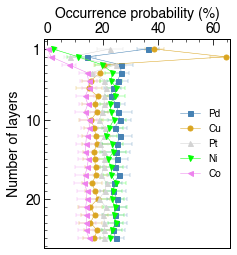

In [3]:
#Segregation profile

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 1.4*1.5*1.67323,1.5*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=7*2.0)
color_list = ['steelblue','goldenrod','lightgray','lime','violet']
fig, ax = plt.subplots(nrows = 1, ncols = 1)

images = io.read('all_images.traj', index=slice(None))

x_axis = np.linspace(1,50,50)[0:25]

sym = [np.array(image.get_chemical_symbols()).reshape(-1,100) for image in images]
sym = np.array(sym)
sym = np.vstack((sym,np.flip(sym, axis=1)))

sym_Co = np.average(np.sum(sym == 'Co', axis=2), axis=0)[0:25]
sym_Ni = np.average(np.sum(sym == 'Ni', axis=2), axis=0)[0:25]
sym_Cu = np.average(np.sum(sym == 'Cu', axis=2), axis=0)[0:25]
sym_Pd = np.average(np.sum(sym == 'Pd', axis=2), axis=0)[0:25]
sym_Pt = np.average(np.sum(sym == 'Pt', axis=2), axis=0)[0:25]

sym_Co_std = np.std(np.sum(sym == 'Co', axis=2), axis=0)[0:25]
sym_Ni_std = np.std(np.sum(sym == 'Ni', axis=2), axis=0)[0:25]
sym_Cu_std = np.std(np.sum(sym == 'Cu', axis=2), axis=0)[0:25]
sym_Pd_std = np.std(np.sum(sym == 'Pd', axis=2), axis=0)[0:25]
sym_Pt_std = np.std(np.sum(sym == 'Pt', axis=2), axis=0)[0:25]

ax.plot(sym_Pd,
        x_axis,
           color = 'steelblue',
           linewidth = 0.5,
           label=r'Pd',
           marker = 's',
           markersize=5)

ax.errorbar(sym_Pd,x_axis, xerr=sym_Pd_std, color = 'steelblue', linestyle='', linewidth = 0.3, capthick=0.3, capsize=2, zorder=-32, alpha=1.0)


ax.plot(sym_Cu,
        x_axis,
           color = 'goldenrod',
           linewidth = 0.5,
           label=r'Cu',
           marker = 'o',
           markersize=5)

ax.errorbar(sym_Cu,x_axis, xerr=sym_Cu_std, color = 'goldenrod', linestyle='', linewidth = 0.3, capthick=0.3, capsize=2, zorder=-32, alpha=1.0)

ax.plot(sym_Pt,
        x_axis,
           color = 'lightgray',
           linewidth = 0.5,
           label=r'Pt',
           marker = '^',
           markersize=5)

ax.errorbar(sym_Pt,x_axis, xerr=sym_Pt_std, color = 'lightgray', linestyle='', linewidth = 0.3, capthick=0.3, capsize=2, zorder=-32, alpha=1.0)

ax.plot(sym_Ni,
        x_axis,
           color = 'lime',
           linewidth = 0.5,
           label=r'Ni',
           marker = 'v',
           markersize=5)

ax.errorbar(sym_Ni,x_axis, xerr=sym_Ni_std, color = 'lime', linestyle='', linewidth = 0.3, capthick=0.3, capsize=2, zorder=-32, alpha=1.0)


ax.plot(sym_Co,
            x_axis,
           color = 'violet',
           linewidth = 0.5,
           label=r'Co',
           marker = '<',
           markersize=5)

ax.errorbar(sym_Co,x_axis, xerr=sym_Co_std, color = 'violet', linestyle='', linewidth = 0.3, capthick=0.3, capsize=2, zorder=-32, alpha=1.0)


ax.set_xlim([-1,66])

ax.minorticks_on()

ax.tick_params(axis="y",direction="in",which='both')
ax.tick_params(axis="x",direction="in",which='both')

ax.legend(frameon=False,loc='right',prop={'size': 10})

ax.invert_yaxis()
ax.xaxis.tick_top()


ax.set_ylabel('Number of layers')
ax.set_xlabel('Occurrence probability (%)')

ax.xaxis.set_label_position('top')

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.set_yticks([1,10,20])
ax.set_xticks([0,20,40,60])

fig.tight_layout()

#plt.savefig('segregation_profile.pdf', format='pdf',transparent = True,dpi=600,bbox_inches='tight')